### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda4.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175


#1. Análisis de facturación



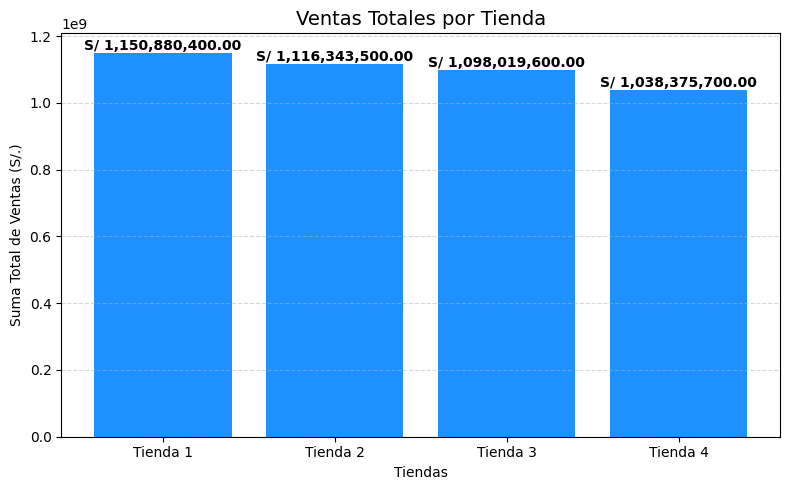

In [ ]:
import matplotlib.pyplot as plt

# Calcular las ventas totales por tienda
ventas_totales = {
    'Tienda 1': tienda["Precio"].sum(),
    'Tienda 2': tienda2["Precio"].sum(),
    'Tienda 3': tienda3["Precio"].sum(),
    'Tienda 4': tienda4["Precio"].sum(),
}

# Extraer datos para el gráfico
tiendas = list(ventas_totales.keys())
valores = list(ventas_totales.values())

# Crear el gráfico
plt.figure(figsize=(8,5))
barras = plt.bar(tiendas, valores, color='dodgerblue')

# Agregar los valores encima de cada barra
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 500, f"S/ {yval:,.2f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Personalizar el gráfico
plt.title("Ventas Totales por Tienda", fontsize=14)
plt.xlabel("Tiendas")
plt.ylabel("Suma Total de Ventas (S/.)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

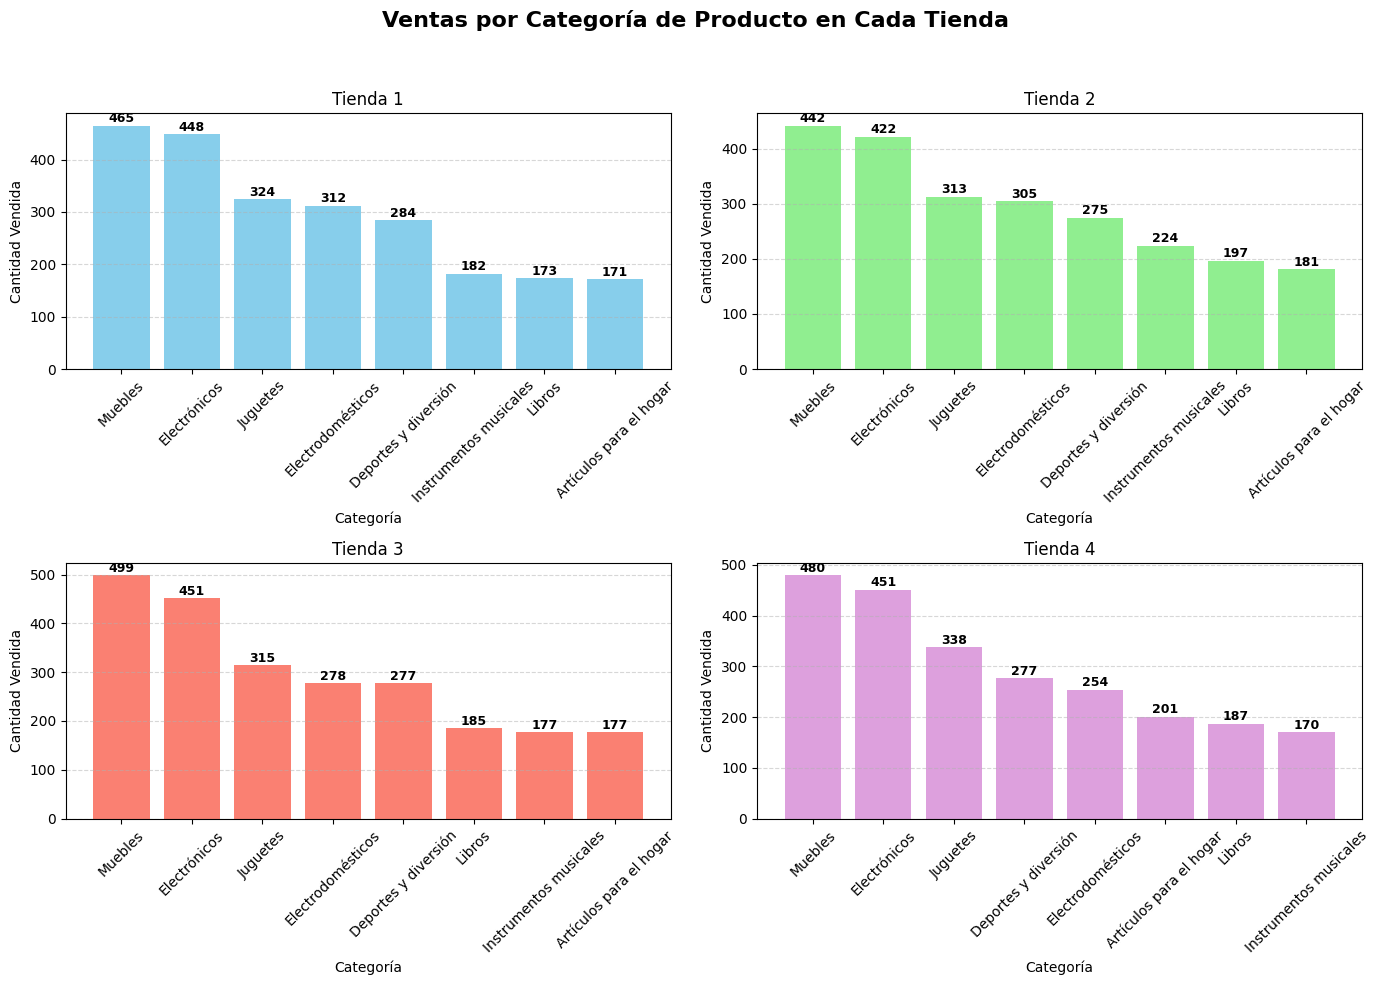

In [ ]:
import matplotlib.pyplot as plt

# Obtener los conteos por categoría
ventas_cat1 = tienda['Categoría del Producto'].value_counts()
ventas_cat2 = tienda2['Categoría del Producto'].value_counts()
ventas_cat3 = tienda3['Categoría del Producto'].value_counts()
ventas_cat4 = tienda4['Categoría del Producto'].value_counts()

# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Ventas por Categoría de Producto en Cada Tienda", fontsize=16, fontweight='bold')

# Función para agregar etiquetas encima de cada barra
def agregar_totales(ax, valores):
    for i, valor in enumerate(valores.values):
        ax.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=9, fontweight='bold')

# Gráfico Tienda 1
axs[0, 0].bar(ventas_cat1.index, ventas_cat1.values, color='skyblue')
axs[0, 0].set_title("Tienda 1")
axs[0, 0].tick_params(axis='x', rotation=45)
agregar_totales(axs[0, 0], ventas_cat1)

# Gráfico Tienda 2
axs[0, 1].bar(ventas_cat2.index, ventas_cat2.values, color='lightgreen')
axs[0, 1].set_title("Tienda 2")
axs[0, 1].tick_params(axis='x', rotation=45)
agregar_totales(axs[0, 1], ventas_cat2)

# Gráfico Tienda 3
axs[1, 0].bar(ventas_cat3.index, ventas_cat3.values, color='salmon')
axs[1, 0].set_title("Tienda 3")
axs[1, 0].tick_params(axis='x', rotation=45)
agregar_totales(axs[1, 0], ventas_cat3)

# Gráfico Tienda 4
axs[1, 1].bar(ventas_cat4.index, ventas_cat4.values, color='plum')
axs[1, 1].set_title("Tienda 4")
axs[1, 1].tick_params(axis='x', rotation=45)
agregar_totales(axs[1, 1], ventas_cat4)

# Ajustes finales
for ax in axs.flat:
    ax.set_ylabel("Cantidad Vendida")
    ax.set_xlabel("Categoría")
    ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

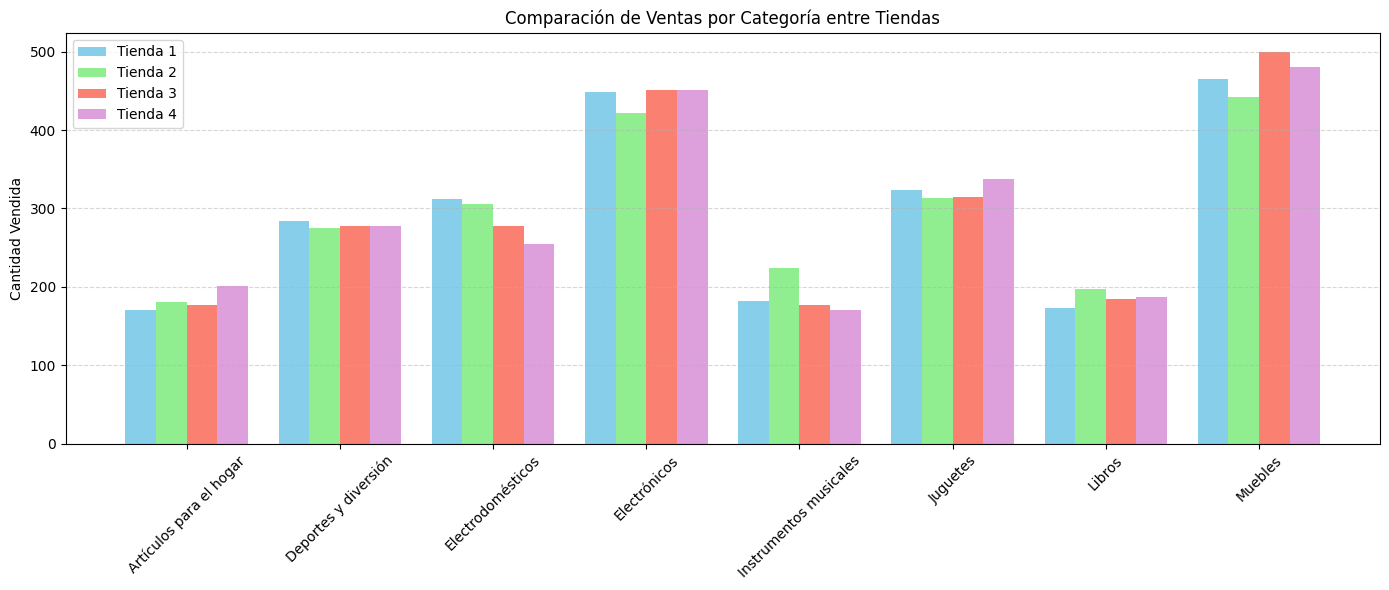

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Unir todas las categorías y asegurarnos de que tengan las mismas
categorias = set(tienda['Categoría del Producto']) | set(tienda2['Categoría del Producto']) | \
             set(tienda3['Categoría del Producto']) | set(tienda4['Categoría del Producto'])
categorias = sorted(list(categorias))

# Contar productos vendidos por categoría en cada tienda
cat_t1 = tienda['Categoría del Producto'].value_counts().reindex(categorias, fill_value=0)
cat_t2 = tienda2['Categoría del Producto'].value_counts().reindex(categorias, fill_value=0)
cat_t3 = tienda3['Categoría del Producto'].value_counts().reindex(categorias, fill_value=0)
cat_t4 = tienda4['Categoría del Producto'].value_counts().reindex(categorias, fill_value=0)

# Datos en formato de tabla
df = pd.DataFrame({
    'Tienda 1': cat_t1,
    'Tienda 2': cat_t2,
    'Tienda 3': cat_t3,
    'Tienda 4': cat_t4
}, index=categorias)

# Crear gráfico de barras agrupadas
x = np.arange(len(categorias))  # posición de las categorías
width = 0.2  # ancho de las barras

plt.figure(figsize=(14, 6))
plt.bar(x - 1.5*width, df['Tienda 1'], width, label='Tienda 1', color='skyblue')
plt.bar(x - 0.5*width, df['Tienda 2'], width, label='Tienda 2', color='lightgreen')
plt.bar(x + 0.5*width, df['Tienda 3'], width, label='Tienda 3', color='salmon')
plt.bar(x + 1.5*width, df['Tienda 4'], width, label='Tienda 4', color='plum')

# Etiquetas y leyenda
plt.xticks(x, categorias, rotation=45)
plt.ylabel("Cantidad Vendida")
plt.title("Comparación de Ventas por Categoría entre Tiendas")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


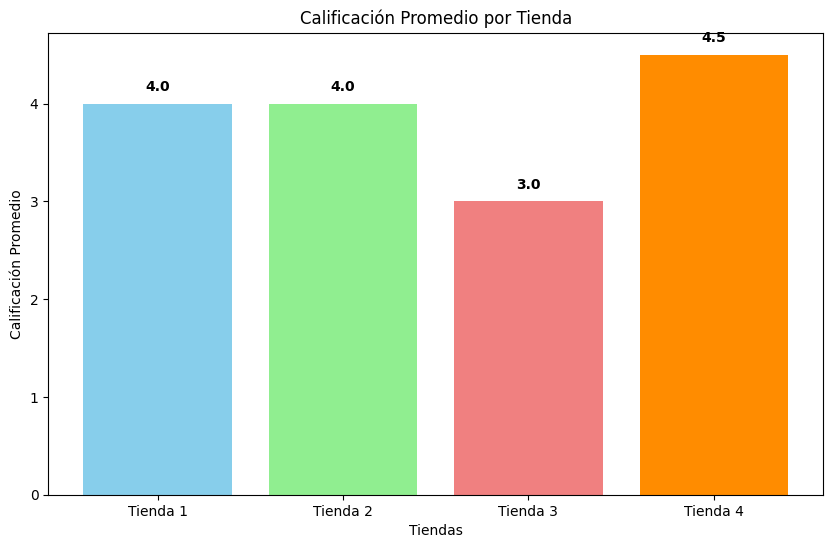

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calificaciones de ejemplo para cada tienda
tienda = pd.DataFrame({'Calificación': [4, 5, 3, 4]})  # Ejemplo de datos
tienda2 = pd.DataFrame({'Calificación': [3, 4, 5, 4]})
tienda3 = pd.DataFrame({'Calificación': [2, 3, 4, 3]})
tienda4 = pd.DataFrame({'Calificación': [5, 4, 4, 5]})

# Calificaciones promedio de cada tienda
calificaciones = [
    tienda["Calificación"].mean(),
    tienda2["Calificación"].mean(),
    tienda3["Calificación"].mean(),
    tienda4["Calificación"].mean()
]

# Nombres de las tiendas
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(tiendas, calificaciones, color=['skyblue', 'lightgreen', 'lightcoral', 'darkorange'])

# Añadir etiquetas y título
plt.xlabel('Tiendas')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio por Tienda')

# Agregar los promedios encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 2), ha='center', va='bottom', fontweight='bold')

# Mostrar el gráfico
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
# Conteo de productos vendidos por tienda
ventas_tienda1 = tienda['Producto'].value_counts()
ventas_tienda2 = tienda2['Producto'].value_counts()
ventas_tienda3 = tienda3['Producto'].value_counts()
ventas_tienda4 = tienda4['Producto'].value_counts()

print("Tienda 1 - Más vendido:", ventas_tienda1.idxmax(), "con", ventas_tienda1.max(), "ventas")
print("Tienda 1 - Menos vendido:", ventas_tienda1.idxmin(), "con", ventas_tienda1.min(), "ventas\n")

print("Tienda 2 - Más vendido:", ventas_tienda2.idxmax(), "con", ventas_tienda2.max(), "ventas")
print("Tienda 2 - Menos vendido:", ventas_tienda2.idxmin(), "con", ventas_tienda2.min(), "ventas\n")

print("Tienda 3 - Más vendido:", ventas_tienda3.idxmax(), "con", ventas_tienda3.max(), "ventas")
print("Tienda 3 - Menos vendido:", ventas_tienda3.idxmin(), "con", ventas_tienda3.min(), "ventas\n")

print("Tienda 4 - Más vendido:", ventas_tienda4.idxmax(), "con", ventas_tienda4.max(), "ventas")
print("Tienda 4 - Menos vendido:", ventas_tienda4.idxmin(), "con", ventas_tienda4.min(), "ventas\n")

Tienda 1 - Más vendido: Microondas con 60 ventas
Tienda 1 - Menos vendido: Auriculares con micrófono con 33 ventas

Tienda 2 - Más vendido: Iniciando en programación con 65 ventas
Tienda 2 - Menos vendido: Juego de mesa con 32 ventas

Tienda 3 - Más vendido: Kit de bancas con 57 ventas
Tienda 3 - Menos vendido: Bloques de construcción con 35 ventas

Tienda 4 - Más vendido: Cama box con 62 ventas
Tienda 4 - Menos vendido: Guitarra eléctrica con 33 ventas



# 5. Envío promedio por tienda

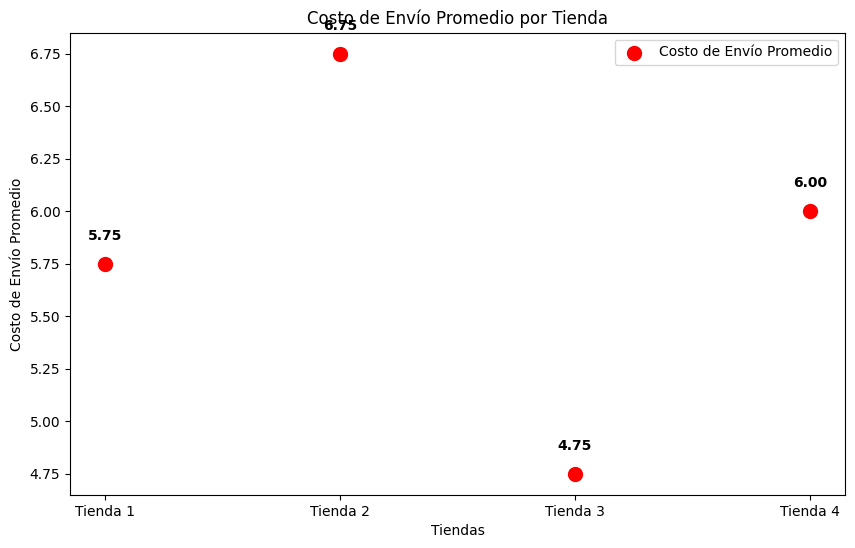

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calificaciones de ejemplo para cada tienda (Costo de Envío)
tienda = pd.DataFrame({'Costo de envío': [5, 6, 7, 5]})  # Ejemplo de datos
tienda2 = pd.DataFrame({'Costo de envío': [6, 7, 8, 6]})
tienda3 = pd.DataFrame({'Costo de envío': [4, 5, 6, 4]})
tienda4 = pd.DataFrame({'Costo de envío': [7, 6, 5, 6]})

# Calificaciones promedio de cada tienda
costos_envio = [
    tienda["Costo de envío"].mean(),
    tienda2["Costo de envío"].mean(),
    tienda3["Costo de envío"].mean(),
    tienda4["Costo de envío"].mean()
]

# Nombres de las tiendas
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

# Crear gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tiendas, costos_envio, color='r', s=100, label='Costo de Envío Promedio')

# Añadir etiquetas con los promedios encima de cada punto
for i, txt in enumerate(costos_envio):
    plt.text(tiendas[i], costos_envio[i] + 0.1, f'{txt:.2f}', ha='center', va='bottom', fontweight='bold')

# Añadir etiquetas y título
plt.xlabel('Tiendas')
plt.ylabel('Costo de Envío Promedio')
plt.title('Costo de Envío Promedio por Tienda')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()



#6. Informe Final

##6.1. Introduccion

El presente informe tiene como objetivo analizar el desempeño de cuatro tiendas en función de tres métricas clave: ventas totales, ventas por categoría de productos, calificación promedio y costo de envío promedio. Con base en estos datos, se identificará la tienda con menor rendimiento para recomendar su venta, respaldando la decisión con un análisis objetivo de sus fortalezas y debilidades en comparación con las demás.

##6.2. Desarrollo

###6.2.1. Ventas Totales por Tienda
Los datos muestran las siguientes ventas totales en soles peruanos (S/):

* Tienda 1: S/ 1,150,880,400.00
* Tienda 2: S/ 1,116,343,500.00
* Tienda 3: S/ 1,098,019,600.00
* Tienda 4: S/ 1,038,375,700.00

**Análisis**:

La Tienda 1 lidera en ventas totales, superando a las demás por un margen significativo.
La Tienda 4 ocupa el último lugar, con ventas aproximadamente un 10% inferiores a las de la Tienda 1.

###6.2.2. Comparación de Ventas por Categoría
Las categorías analizadas incluyen:

* Articulos para el hogar
* Deporte y Diversion
* Electrodomesticos
* Electronicos
* Instrumentos musicales
* Juguetes
* Libros
* Muebles

**Analisis**
La tienda 3 tiene un comportamiento irregular, dado que en ninguna categoria sobresale en ventas

###6.2.3. Calificación Promedio por Tienda
Las calificaciones son:

* Tienda 1: 4.0
* Tienda 2: 4.0
* Tienda 3: 3.0
* Tienda 4: 4.5

**Analisis**
1. La Tiendas 4 tienen la mejor calificación (4.5), lo que indica alta satisfacción del cliente.
2. La Tienda 3 tiene una calificación más baja (3.0), lo que  afecta la reputación de la marca

###6.2.4. Costo de Envío Promedio

Los costos son:

* Tienda 1: S/ 5.75
* Tienda 2: S/ 6.75
* Tienda 3: S/ 4.75
* Tienda 4: S/ 6.00

**Análisis:**

La Tienda 3 tiene el costo de envío más bajo, pero esto no compensa su bajo desempeño en ventas y calificación.

##6.3. Conclusión y Recomendación

*Tienda Recomendada para Vender: Tienda 3*

**Justificación:**

* Ventas Totales: Es la penultima tienda, con ingresos (S/ 1,098,019,600.00), solamente por delante de la tienda 4 (S/ 1,038,375,700.00)

* Calificación y Costos: su calificacion entre los clientes es la mas baja por lo que perjudica a la marca y esto puede afectar a los demas, mientras que la tienda 4 tiene el mejor promedio.

* Ventas por Categorias: las tiendas 1 y 2 son las que mas vende, en la tienda 3 el comportamiento es irregular

* Enfoque Estratégico: Vender la Tienda 3 permitiría reasignar recursos a tiendas más rentables (como la Tienda 1, 2 y 4), optimizando así las operaciones y mejorando la rentabilidad general.

**Acciones Sugeridas:**

1. Realizar una auditoría detallada de la Tienda 3 para confirmar su bajo desempeño antes de proceder con la venta.

2. Invertir en las Tiendas 1, 2 y 4 que muestran un equilibrio positivo entre ventas, satisfacción del cliente y costos operativos.
